操盤人風險屬性偏好客戶？
客戶找尋操盤人是因為地緣關係還是風險屬性類似？

In [19]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_excel("Client_data.xlsx", sheetname="OnshoreData")

df[['assessmentrisk', 'address1_line1', 'agentcode', 'institutionname' ]]


,assessmentrisk,address1_line1,agentcode,institutionname
0,5.0,台北市南港****************************,A0769,多元理財部
1,5.0,桃園市楊梅****************************,A0431,多元理財部
2,5.0,高雄市左營****************************,A0776,高雄分公司
3,5.0,台北市內湖****************************,A0278,法人行銷台北一組
4,4.0,新北市汐止****************************,A0769,多元理財部
5,5.0,桃園市中壢****************************,A0769,多元理財部
6,4.0,雲林縣斗六****************************,A0769,多元理財部
7,2.0,新北市蘆洲****************************,RCAM1,多元理財部
8,5.0,彰化縣福興****************************,A0307,台中分公司
9,5.0,彰化縣福興****************************,A0307,台中分公司


In [84]:
# process data
# 只取agentcode前五碼（需全部轉成str再用index）
import numpy as np

agent_data = np.array(df['agentcode'])
agent_str = list(map(str, agent_data))
func = lambda x: x[:5]
agent_lst = []
for agent in agent_str:
    agent_lst.append(func(agent))
    
data = list() # extract data needed and pair them up in a small list
for i in range(df.shape[0]):
    address = df['address1_line1'].apply(lambda x : x[:2])[i]
    risk = df['assessmentrisk'][i]
    agent = agent_lst[i]
    insplace = df['institutionname'][i]
    add_ri_ag_insp = [address, risk, agent, insplace]
    data.append(add_ri_ag_insp)

# data[[address, risk, agent, insplace]]

def counting(a_data):
    a = {}
    for line in a_data:
        if line not in a:
            a[line] = 0
        a[line] += 1
    return a

def lst_in_dict(dat, cat, subcat):
    adict = {}
    for alist in dat:
        if alist[cat] in adict:
            adict[alist[cat]].append(alist[subcat])
        else:
            adict[alist[cat]] = [alist[subcat]]
    return adict

agent_dict = counting(agent_lst) #每個業務員處理的客戶數

# 每個業務員對應的客戶風險屬性
agent_code = 2
risk_level = 1
agent_risk = lst_in_dict(data, agent_code, risk_level)

# 針對超過兩位客戶的業務員做進一步分析
to_del = []
for agent in agent_risk:
    if len(agent_risk[agent]) < 2: # 刪除低於兩位客戶數的業務員
        to_del.append(agent)
    agent_risk[agent].sort() # 把風險屬性排序
for name in to_del:
    if agent_risk.get(name): agent_risk.pop(name)

print(agent_risk)
# 把資料整理成[風險]

{'A0769': [4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0], 'A0431': [4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0], 'A0776': [5.0, 5.0], 'RCAM1': [2.0, 2.0, nan, 2.0, 4.0, 5.0, nan, 4.0], 'A0307': [5.0, 5.0, 5.0, 5.0], 'A0524': [4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0], 'S0005': [5.0, 5.0], 'A0780': [5.0, 5.0], 'A0001': [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0], 'A0367': [5.0, 5.0, 5.0], 'A0700': [5.0, 5.0], 'A0642': [5.0, 5.0], 'A0532': [5.0, 5.0]}


Text(0.5,1,'業務員績效')

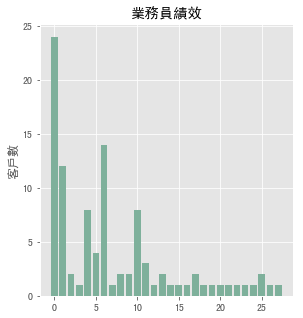

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

# show Chinese character
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (10, 5)


ind = np.arange(len(agent_dict.keys()))
plt.subplot(1, 2, 1) 
plt.bar(ind, agent_dict.values(), width = 0.8, color="#7EB09B")
plt.ylabel("客戶數") 
plt.title("業務員績效")

plt.subplot(1, 2, 2)
